# EUR-PHP EXCHANGE RATE

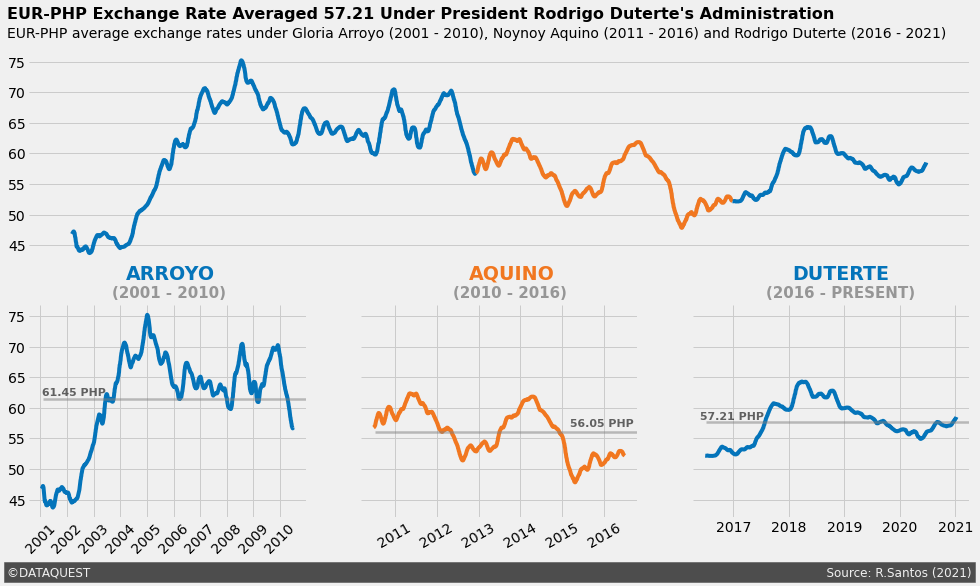

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


df = pd.read_csv(r'C:\Users\Mico\OneDrive\Desktop\DATASETS\KAGGLE\DAILY EXCHANGE RATES PER EURO 1999-2021\euro-daily-hist_1999_2020.csv')


df.rename(columns = {r'Period\Unit:':'Time', \
                     '[Philippine peso ]': 'PH_peso'}, 
          inplace = True)
# Since the `Time` should have datetime datatype
df['Time'] = df['Time'].apply(pd.to_datetime)

df.drop(df[df['PH_peso'] == '-'].index,
        inplace = True)
df['PH_peso'] = df['PH_peso'].astype(float)

df.sort_values('Time', inplace = True)

euro_to_php = df[['Time','PH_peso']].copy()
euro_to_php = euro_to_php[euro_to_php['Time'] >= dt.datetime(2001,1,20)]

# Moving average
moving_average_30 = df['PH_peso'].rolling(30).mean()

euro_to_php['moving_average_30'] = moving_average_30

# Terms of presidents
gloria_term = euro_to_php[(euro_to_php['Time'] >= dt.datetime(2001,1,20)) & (euro_to_php['Time'] <= dt.datetime(2010,6,30))]
pnoy_term = euro_to_php[(euro_to_php['Time'] >= dt.datetime(2010,6,30)) & (euro_to_php['Time'] <= dt.datetime(2016,6,30))]
pd30_term = euro_to_php[euro_to_php['Time'] >= dt.datetime(2016,6,30)]

# Avg exchange rates per terms

gloria_avg = gloria_term['moving_average_30'].mean()
pnoy_avg = pnoy_term['moving_average_30'].mean()
du30_avg = pd30_term['moving_average_30'].mean()

# Plotting

plt.style.use('fivethirtyeight')

fig,ax = plt.subplots(2,3,figsize = (15,8), sharey= True)
gs = ax[0, 2].get_gridspec() # get the specification of the subplot above
for i in range(3):
    ax[0,i].remove()
axnew = fig.add_subplot(gs[0,:]) # merged line graph

# Removing the spines
border = ['left','right','top','bottom']

axnew.spines[border].set_visible(False)
for graph in range(3):
    ax[1,graph].spines[border].set_visible(False)

# Removing tick and tick labels
axnew.tick_params(bottom = False, left = False)
for graph in range(3):
    ax[1,graph].tick_params(bottom = False, left = False)
axnew.grid(b= False, axis = 'x')
axnew.set_xticklabels([])
    
#Main
axnew.plot(euro_to_php['Time'], euro_to_php['moving_average_30'], alpha = 0.1)
axnew.plot(gloria_term['Time'], gloria_term['moving_average_30'], color = '#0474BA')
axnew.plot(pnoy_term['Time'], pnoy_term['moving_average_30'], color = '#F17720')
axnew.plot(pd30_term['Time'], pd30_term['moving_average_30'], color = '#0474BA')
#Gloria
ax[1,0].plot(gloria_term['Time'], gloria_term['moving_average_30'], color = '#0474BA')
ax[1,0].xaxis.set_major_locator(mdates.YearLocator()) # Extracts year and format it on the graph
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter(('%Y')))
plt.setp(ax[1,0].xaxis.get_majorticklabels(), rotation=45) # rotates the label

#Pnoy
ax[1,1].plot(pnoy_term['Time'], pnoy_term['moving_average_30'], color = '#F17720')
ax[1,1].xaxis.set_major_locator(mdates.YearLocator()) # Extracts year and format it on the graph
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter(('%Y')))
plt.setp(ax[1,1].xaxis.get_majorticklabels(), rotation=30) # rotates the label

#Duterte
ax[1,2].plot(pd30_term['Time'], pd30_term['moving_average_30'], color = '#0474BA')
ax[1,2].xaxis.set_major_locator(mdates.YearLocator()) # Extracts year and format it on the graph
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter(('%Y')))


#mean lines
ax[1,0].axhline(gloria_avg, alpha = 0.5, color = 'grey', linewidth = 2.5,  xmin = .05, xmax = 1)
ax[1,0].text(11350,62,s = '61.45 PHP', size = 11, weight = 'bold', alpha = 0.6)
ax[1,1].axhline(pnoy_avg, alpha = 0.5, color = 'grey', linewidth = 2.5, xmin = .05, xmax = 1)
ax[1,1].text(16500,57,s = '56.05 PHP', size = 11, weight = 'bold', alpha = 0.6)
ax[1,2].axhline(du30_avg, alpha = 0.5, color = 'grey', linewidth = 2.5, xmin = .05, xmax = 1)
ax[1,2].text(16950,58.05,s = '57.21 PHP', size = 11, weight = 'bold', alpha = 0.6)

#Add title
axnew.text(10790,82,s = 'EUR-PHP Exchange Rate Averaged 57.21 Under President Rodrigo Duterte\'s Administration', weight = 'bold', size = 16)
axnew.text(10790,79,s = 'EUR-PHP average exchange rates under Gloria Arroyo (2001 - 2010), Noynoy Aquino (2011 - 2016) and Rodrigo Duterte (2016 - 2021)')
axnew.text(10790,-9,s = '©DATAQUEST' + ' '*190 + 'Source: R.Santos (2021)',
        color = '#f0f0f0', 
        backgroundcolor = '#4d4d4d', 
        size=12)

#President label
ax[1,0].text(12500,81,s = 'ARROYO', size = 19, weight = 'bold', color = '#0474BA')
ax[1,0].text(12300,78,s = '(2001 - 2010)', size = 15, weight = 'bold', color = 'grey', alpha = 0.8)

ax[1,0].text(17200,81,s = 'AQUINO', size = 19, weight = 'bold', color = '#F17720')
ax[1,0].text(16980,78,s = '(2010 - 2016)', size = 15, weight = 'bold', color = 'grey', alpha = 0.8)

ax[1,0].text(21630,81,s = 'DUTERTE', size = 19, weight = 'bold', color = '#0474BA')
ax[1,0].text(21270,78,s = '(2016 - PRESENT)', size = 15, weight = 'bold', color = 'grey', alpha = 0.8)

plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

